<a href="https://www.kaggle.com/code/yashraj2023/endsem-project?scriptVersionId=269902101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/electric-power-consumption-data-set")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/electric-power-consumption-data-set


In [5]:
import pandas as pd
import os

# Example: Load the CSV file (adjust name if needed)
data_file = os.path.join(path, "household_power_consumption.txt")  # or .csv if unzipped

data = pd.read_csv(data_file, sep=';', 
                   parse_dates={'DateTime': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['?'],
                   low_memory=False)

print(data.head())




/tmp/ipykernel_37/2747277094.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(data_file, sep=';',
/tmp/ipykernel_37/2747277094.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(data_file, sep=';',


             DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


/tmp/ipykernel_37/2747277094.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_file, sep=';',


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None


In [7]:
print(data.isnull().sum())

DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [8]:
data_clean = data.dropna()

In [9]:
data_clean.set_index('DateTime', inplace=True)

In [10]:
data_clean = data_clean.copy()

for col in data_clean.columns:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')


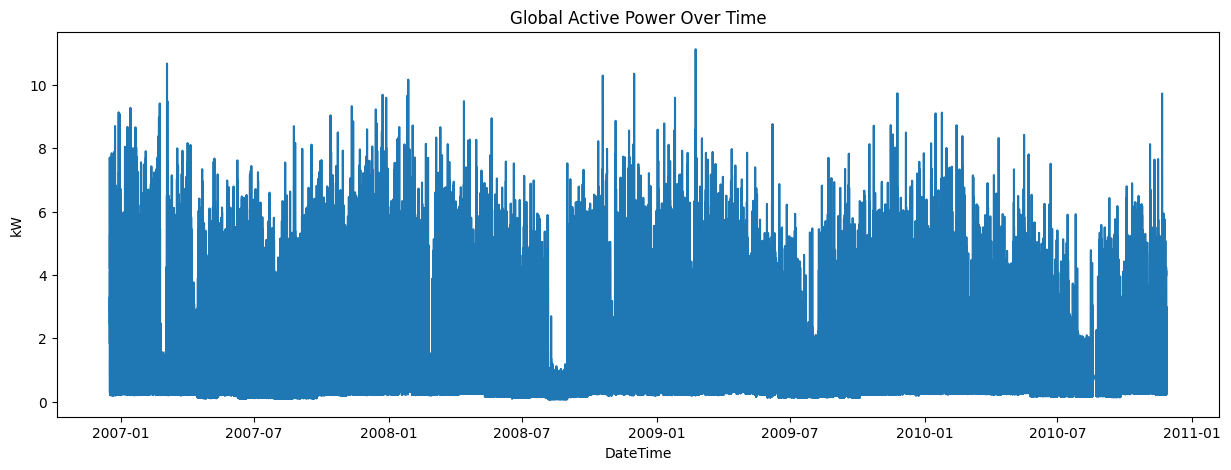

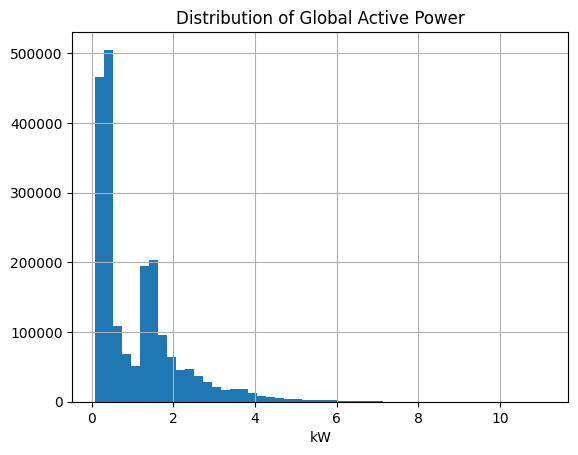

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

In [11]:
import matplotlib.pyplot as plt

# Plot global active power over time
plt.figure(figsize=(15,5))
plt.plot(data_clean['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('DateTime')
plt.ylabel('kW')
plt.show()

# Histogram example
data_clean['Global_active_power'].hist(bins=50)
plt.title('Distribution of Global Active Power')
plt.xlabel('kW')
plt.show()

# Basic statistics
print(data_clean.describe())


In [12]:
# Resample to hourly averages (reduce minute noise)
data_hourly = data_clean.resample('1H').mean()

# Preview
print(data_hourly.head())


/tmp/ipykernel_37/3115019774.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data_clean.resample('1H').mean()


                     Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-

In [13]:
data_hourly = data_hourly.copy()
data_hourly['hour'] = data_hourly.index.hour
data_hourly['dayofweek'] = data_hourly.index.dayofweek
data_hourly['is_weekend'] = (data_hourly['dayofweek'] >= 5).astype(int)

data_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,is_weekend
DateTime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,1


In [14]:
for lag in [1, 2, 3, 24]:
    data_hourly[f'lag_{lag}'] = data_hourly['Global_active_power'].shift(lag)

data_hourly['rolling_mean_3h'] = data_hourly['Global_active_power'].rolling(window=3).mean()
data_hourly['rolling_std_3h']  = data_hourly['Global_active_power'].rolling(window=3).std()

data_hourly = data_hourly.dropna()
data_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_24,rolling_mean_3h,rolling_std_3h
DateTime,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,0.166633,234.229833,14.510000,0.0,0.466667,16.816667,17,6,1,3.326033,2.985400,2.092633,4.222889,3.239400,0.223644
2006-12-17 18:00:00,3.697100,0.135067,234.372333,15.750000,0.0,0.000000,16.833333,18,6,1,3.406767,3.326033,2.985400,3.632200,3.476633,0.195150
2006-12-17 19:00:00,2.908400,0.265167,233.195667,12.516667,0.0,0.516667,16.683333,19,6,1,3.697100,3.406767,3.326033,3.400233,3.337422,0.398896
2006-12-17 20:00:00,3.361500,0.271500,236.426500,14.276667,0.0,1.116667,17.116667,20,6,1,2.908400,3.697100,3.406767,3.268567,3.322333,0.395806
2006-12-17 21:00:00,3.040767,0.267967,239.104167,12.716667,0.0,1.200000,17.500000,21,6,1,3.361500,2.908400,3.697100,3.056467,3.103556,0.232984


In [15]:
from sklearn.model_selection import train_test_split

X = data_hourly[['lag_1','lag_2','lag_3','lag_24','hour','dayofweek','is_weekend','rolling_mean_3h','rolling_std_3h']]
y = data_hourly['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 27183
Test samples: 6796


In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae, "RMSE:", rmse)




MAE: 0.0003094113673916394 RMSE: 0.00043281496452178065


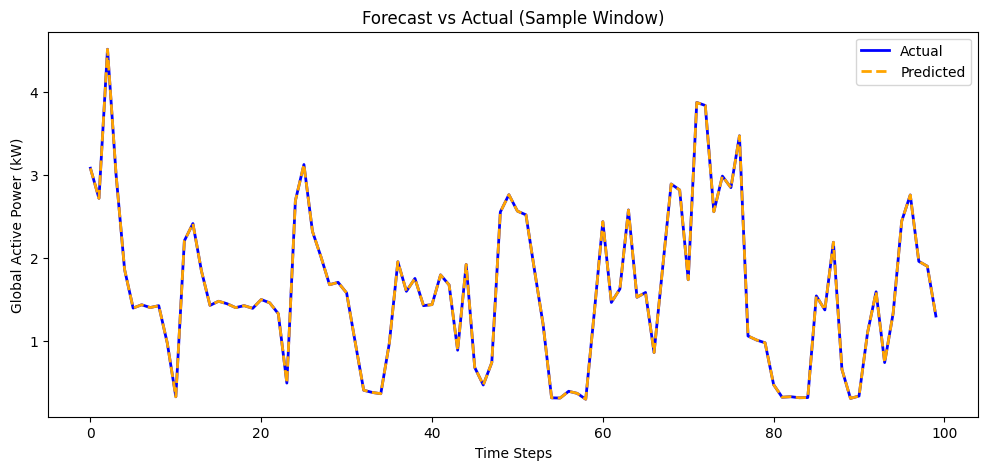

In [20]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Forecast vs Actual (Sample Window)')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()


<Figure size 1200x500 with 0 Axes>

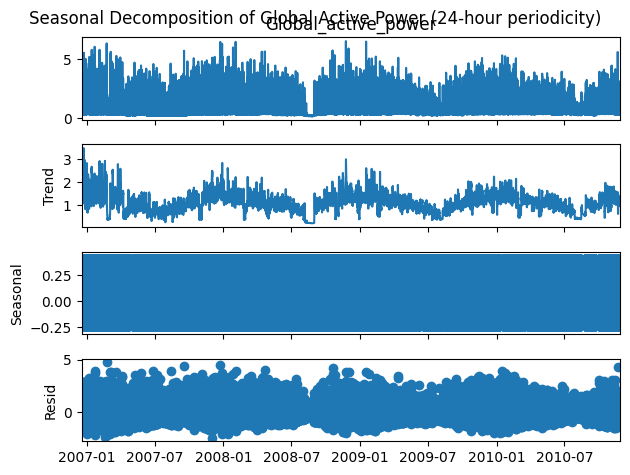

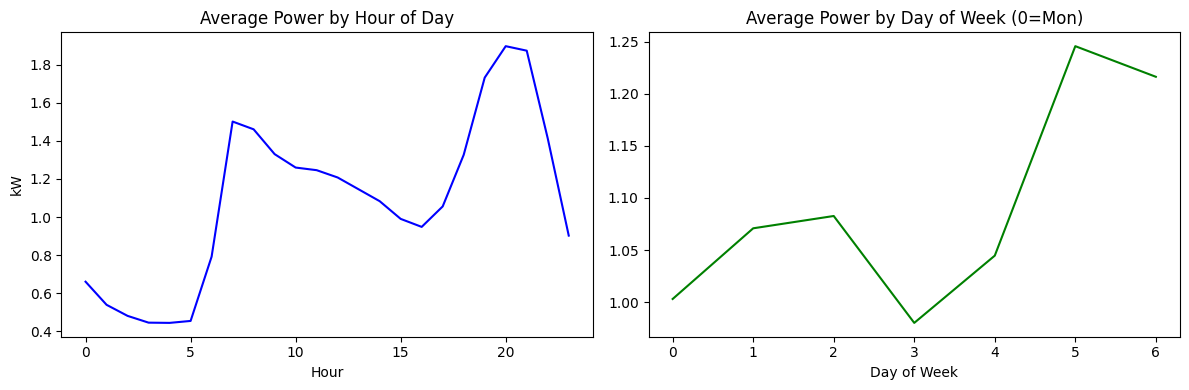

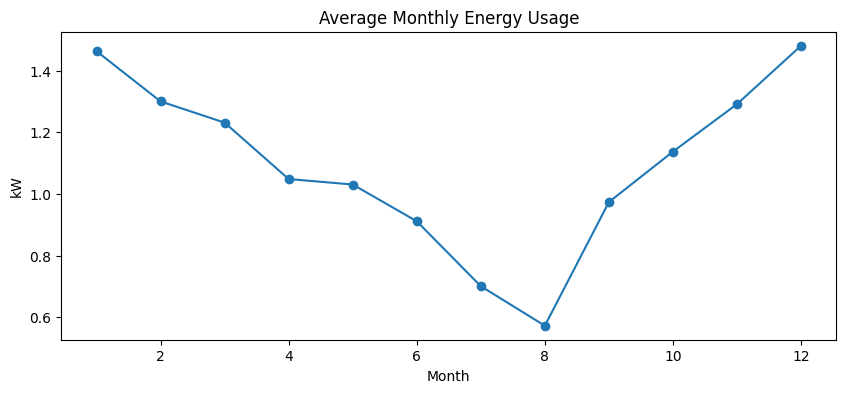

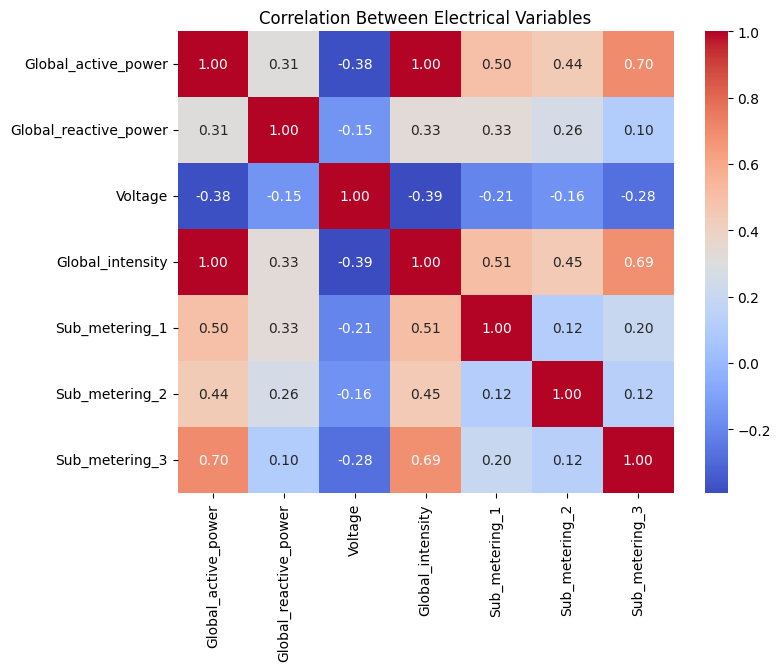

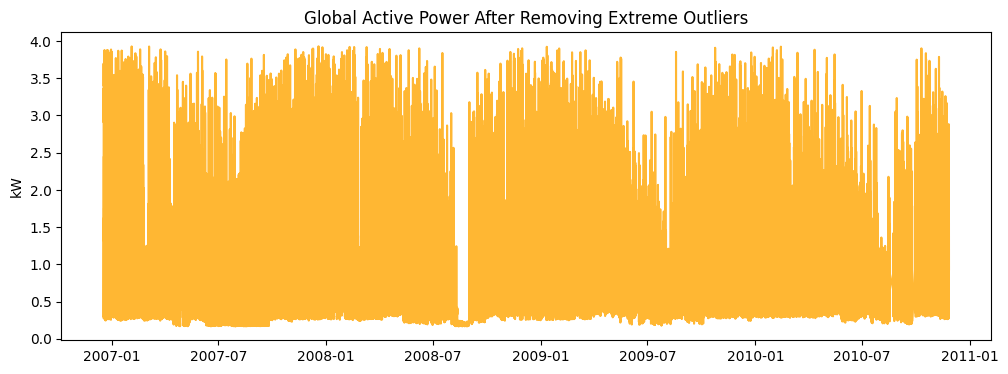

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


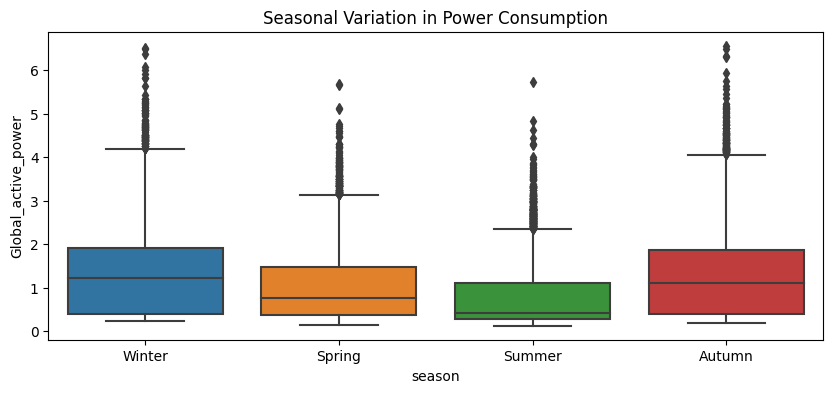

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


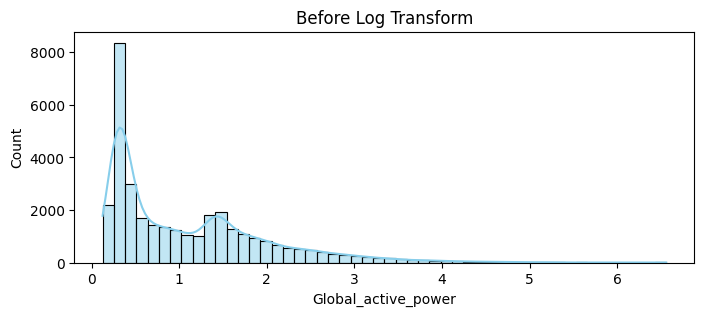

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


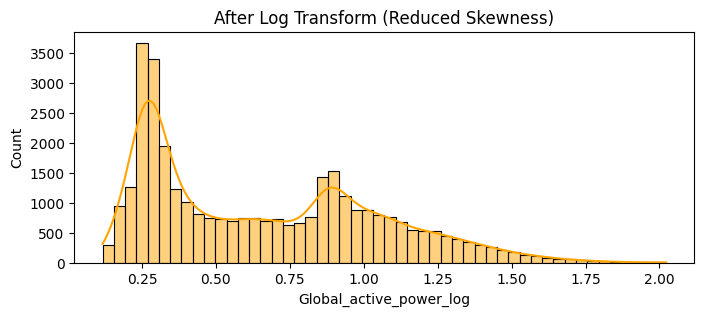

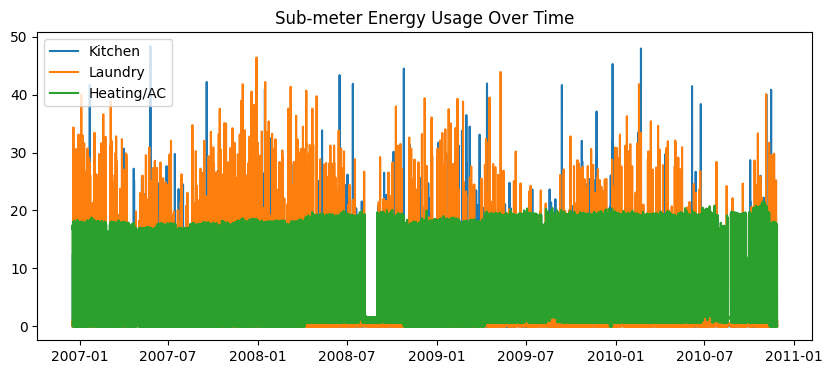

✅ Added columns: ['hour', 'dayofweek', 'is_weekend', 'lag_1', 'lag_2', 'lag_3', 'lag_24', 'rolling_mean_3h', 'rolling_std_3h', 'month', 'power_factor', 'diff_1', 'ewm_6h', 'sin_hour', 'cos_hour', 'sin_dow', 'cos_dow', 'season', 'Global_active_power_log']

Final dataset shape: (33979, 26)


In [21]:
# ============================================================
# ADVANCED EDA & FEATURE ENGINEERING FOR BETTER MODEL TRAINING
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 1️⃣ --- Seasonal Decomposition (Daily pattern) ---
plt.figure(figsize=(12, 5))
result = seasonal_decompose(data_hourly['Global_active_power'], model='additive', period=24)
result.plot()
plt.suptitle("Seasonal Decomposition of Global Active Power (24-hour periodicity)")
plt.show()

# 2️⃣ --- Hourly and Weekly Average Patterns ---
fig, ax = plt.subplots(1, 2, figsize=(12,4))
data_hourly.groupby('hour')['Global_active_power'].mean().plot(ax=ax[0], color='blue')
ax[0].set_title('Average Power by Hour of Day')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('kW')

data_hourly.groupby('dayofweek')['Global_active_power'].mean().plot(ax=ax[1], color='green')
ax[1].set_title('Average Power by Day of Week (0=Mon)')
ax[1].set_xlabel('Day of Week')
plt.tight_layout()
plt.show()

# 3️⃣ --- Monthly Trends ---
data_hourly['month'] = data_hourly.index.month
plt.figure(figsize=(10,4))
plt.plot(data_hourly.groupby('month')['Global_active_power'].mean(), marker='o')
plt.title('Average Monthly Energy Usage')
plt.xlabel('Month')
plt.ylabel('kW')
plt.show()

# 4️⃣ --- Correlation Heatmap ---
corr = data_hourly[['Global_active_power','Global_reactive_power','Voltage',
                    'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Electrical Variables')
plt.show()

# 5️⃣ --- Outlier Removal & Visualization ---
q_low = data_hourly['Global_active_power'].quantile(0.01)
q_hi  = data_hourly['Global_active_power'].quantile(0.99)
filtered = data_hourly[(data_hourly['Global_active_power'] >= q_low) & 
                       (data_hourly['Global_active_power'] <= q_hi)]

plt.figure(figsize=(12,4))
plt.plot(filtered['Global_active_power'], color='orange', alpha=0.8)
plt.title('Global Active Power After Removing Extreme Outliers')
plt.ylabel('kW')
plt.show()

# 6️⃣ --- Power Factor & Derived Features ---
data_hourly['power_factor'] = data_hourly['Global_active_power'] / (
    data_hourly['Global_active_power'] + data_hourly['Global_reactive_power'] + 1e-5)

data_hourly['diff_1'] = data_hourly['Global_active_power'].diff()
data_hourly['ewm_6h'] = data_hourly['Global_active_power'].ewm(span=6).mean()

# 7️⃣ --- Fourier Features for Cyclic Encoding ---
data_hourly['sin_hour'] = np.sin(2 * np.pi * data_hourly['hour']/24)
data_hourly['cos_hour'] = np.cos(2 * np.pi * data_hourly['hour']/24)
data_hourly['sin_dow']  = np.sin(2 * np.pi * data_hourly['dayofweek']/7)
data_hourly['cos_dow']  = np.cos(2 * np.pi * data_hourly['dayofweek']/7)

# 8️⃣ --- Season Feature ---
data_hourly['season'] = pd.cut(data_hourly.index.month,
                               bins=[0,3,6,9,12],
                               labels=['Winter','Spring','Summer','Autumn'])

plt.figure(figsize=(10,4))
sns.boxplot(x='season', y='Global_active_power', data=data_hourly)
plt.title('Seasonal Variation in Power Consumption')
plt.show()

# 9️⃣ --- Log Transformation of Target (Skew Correction) ---
plt.figure(figsize=(8,3))
sns.histplot(data_hourly['Global_active_power'], bins=50, kde=True, color='skyblue')
plt.title("Before Log Transform")
plt.show()

data_hourly['Global_active_power_log'] = np.log1p(data_hourly['Global_active_power'])

plt.figure(figsize=(8,3))
sns.histplot(data_hourly['Global_active_power_log'], bins=50, kde=True, color='orange')
plt.title("After Log Transform (Reduced Skewness)")
plt.show()

# 🔟 --- Sub-meter Usage Pattern (for optimization prep) ---
plt.figure(figsize=(10,4))
plt.plot(data_hourly['Sub_metering_1'], label='Kitchen')
plt.plot(data_hourly['Sub_metering_2'], label='Laundry')
plt.plot(data_hourly['Sub_metering_3'], label='Heating/AC')
plt.title('Sub-meter Energy Usage Over Time')
plt.legend()
plt.show()

# ✅ --- Quick Summary of New Features ---
print("✅ Added columns:", 
      [col for col in data_hourly.columns if col not in ['Global_active_power','Global_reactive_power','Voltage',
                                                        'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']])
print("\nFinal dataset shape:", data_hourly.shape)


In [19]:
data_hourly.to_csv('/kaggle/working/data_hourly.csv', index=True)
forecast_df = pd.DataFrame({'datetime': data_hourly.index[-len(y_test):],
                            'actual': y_test.values,
                            'predicted': y_pred})
forecast_df.to_csv('/kaggle/working/forecast.csv', index=False)
